c221011 김수민

## statsmodels 라이브러리 활용 회귀분석
변수의 명칭
- endog: 내생변수 = 종속변수 = x
- exog: 외생변수 = 독립변수 = y
- 일반적으로 내생변수는 통계 모형에 포함된 변수이고 외생변수는 포함되지 않은 것들을 말하지만 이 라이브러리 안에서는 다른 의미로 정의해 사용함으로 주의 

통계 모형 구현 방식
- statsmodels.api
    - 종속변수와 독립변수를 직접 지정
    - `함수명(종속변수, 독립변수)`
    - 함수명의 앞글자는 대문자로 시작
- statsmodels.formula.api
    - Pasty 패키지에서 사용하는 모형 정의 문자열을 사용
    - `함수명('종속변수~독립변수', data=데이터프레임) `형태로 사용
    - 함수명의 앞글자는 소문자로 시작

statsmodels.api
- 통계 분석을 위한 클래스와 함수를 제공
- 주요함수
    - Regression(OLS,GLS), Imputation(MI, MICE) 등

statsmodels.formula.api
- statsmodels.api에서 제공하는 함수를 Pasty 수식 문자열과 Dataframe을 사용할 수 있도록 하기 위한 편의 인터페이스
- 주요함수(소문자)
    - ols(formula, data): Ordinary Least Squares(OLS)
    - logit(formula, data): 로지스틱 회귀 모형
    - poisson(formula, data): 포아송 회귀 모형
    - glm(formula, data, family): 일반화 선형 모형

statsmodels 적용 프로세스
1. 라이브러리 임포트 (statsmodels.api as sm/ statsmodels.formula.api as smf)
2. 데이터 준비
3. 통계 모형 객체 생성
    - model=선택한 라이브러리 사용
4. 모형 피팅
    - result=model.fit()
5. 분석 결과 요약
    - result.summary()
6. 모형 평가
    - 모형 적합성, 유의성 검정 등
7. 모형 예측
    - result.predict(X)


### 1. 단순 선형 회귀 분석 예제
- 수축기 혈압(SBP, 독립변수)에 따른 이완기 혈압(DBP, 종속변수)의 회귀분석
- 데이터를 가상으로 생성하여 회귀분석을 수행
$$ DBP = -5.0 + 0.7\times SBP +\varepsilon $$

데이터 생성

In [64]:
#라이브러리 임포트 및 기본 설정
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
pd.options.display.float_format='{:.2f}'.format
plt.rcParams['figure.figsize']=[8,5]

#데이터 생성
np.random.seed(42)
#수축기혈압(SBP) 데이터 생성
df= pd.DataFrame({
    'SBP': np.random.normal(120,15,30)
})
#이완기 혈압(DBP):-0.5+0.7*SBP+랜덤노이즈
df['DBP']=-5.0+df['SBP']*0.7+np.random.randint(-15,15,30)
df.head()

,SBP,DBP
0,127.45,88.22
1,117.93,89.55
2,129.72,84.80
3,142.85,106.99
4,116.49,67.54


변수의 데이터 유형 확인
- 회귀분석은 모두 수치형 데이터여야 함(등간, 비율척도)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SBP     30 non-null     float64
 1   DBP     30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


- float64 유형으로 데이터 타입이 실수임을 알 수 있다.   
- 회귀분석 진행 가능하다. 

In [66]:
#기술통계량 확인
df.describe()

,SBP,DBP
count,30.00,30.00
mean,117.18,76.12
std,13.50,14.22
min,91.30,52.89
25%,111.13,66.91
50%,116.49,72.81
75%,125.41,87.59
max,143.69,108.58


- 평균과 중앙값이 유사하므로 정규분포를 가진다고 추측할 수 있다. 

산점도 분석

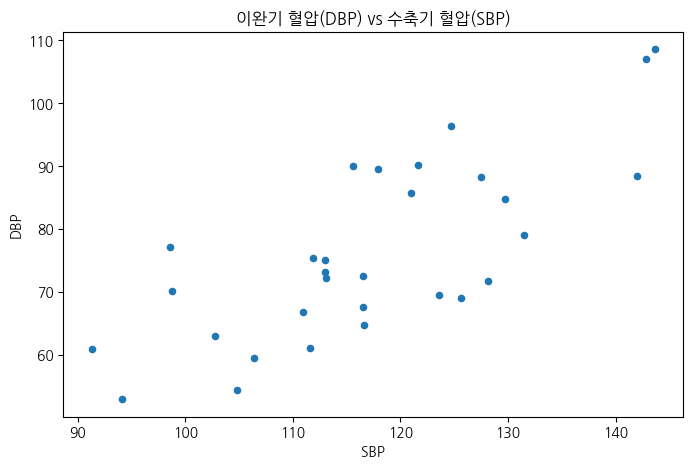

In [67]:
df.plot(
    kind='scatter',
    x='SBP',
    y='DBP',
    title='이완기 혈압(DBP) vs 수축기 혈압(SBP)'
);

- 대략 선형 관계인지, 데이터가 정규분포로 존재하는 지, 이상치가 존재하는지 등을 파악할 수 있다.
- 현재 그래프에서는 r값이 0.8쯤 나온다고 생각해볼 수 있다.(밀집도) 
- 회귀선은 데이터가 존재하는 구간에서만 존재한다. 이 구간을 내삽이라 하며 벗어나는 구간은 외삽이라 하는데 내삽인 구간 내에서만 회귀선이 유효하다. 회귀선을 늘려서 사용할 수 없다.   

회귀모형 수립
- 단순선형회귀모형
$$ DBP = \beta_0 + \beta_1 \times SBP + \varepsilon $$

상관분석

In [68]:
from scipy.stats import pearsonr

pearson_corr, pearson_p = pearsonr(df['DBP'],df['SBP'])
print(f'Pearson 상관계수: {pearson_corr:.3f}, p-값 {pearson_p:.3f}')
if pearson_p<=0.05:
    print('Pearson 상관계수는 통계적으로 유의함')
else:
    print('Pearson 상관계수는 통계적으로 유의하지 않음')

Pearson 상관계수: 0.751, p-값 0.000
Pearson 상관계수는 통계적으로 유의함


회귀계수의 추정

- 상관계수는 0.75로 강한 양의 상관계수로 나타남

In [69]:
import statsmodels.formula.api as smf
#회귀모형 생성 (종족변수 ~ 독립변수)
formula='DBP~SBP'
#ols클래스로 선형 회귀 모형의 객체 model을 생성
model= smf.ols(formula,data=df)
#fit 메서드로 모형 추정, 추정 결과는 객체 result에 저장
result = model.fit()

In [70]:
#추정한 회귀선
print('표본회귀선(모회귀선의 추정)')
print(f"절편은 {result.params['Intercept']}이고, 기울기는 {result.params['SBP']}")
print('따라서, 추정된 회귀선은')
print(f"DBP = {result.params['Intercept']:.2f}+{result.params['SBP']:.2f}*SBP")


표본회귀선(모회귀선의 추정)
절편은 -16.499809964665666이고, 기울기는 0.7904592019618323
따라서, 추정된 회귀선은
DBP = -16.50+0.79*SBP


- 절편의 값은 원래 모형과 차이가 있지만 기울기는 유사하게 나옴. 데이터 개수가 더 충분하다면 정확도가 높아질 것 

표본회귀선(모회귀선의 추정)     
절편은 -7.897977695740927이고, 기울기는 0.7197393807072535      
따라서, 추정된 회귀선은     
DBP = -7.90+0.72*SBP

- 위는 데이터 개수를 100개로 늘렸을 때 결과값으로  절편과 독립변수의 계수 모두 전보다 회귀계수 원모형과 유사함 

모형 평가

In [71]:
print('='*20, '1. 회귀 모형의 적합도 평가', '='*20)
print(f"결정계수: {result.rsquared}")

==================== 1. 회귀 모형의 적합도 평가 ====================
결정계수: 0.5633721028347718


- 결정계수가 아주 높은 값은 아님(밀집도가 보통 정도)

- 회귀 모형의 적합성 검정은 표본 회귀 모형이 주어진 데이터를 얼마나 잘 설명하는지를 평가
- 상대 평가 방법인 결정 계수($R^2$)로 평가
    - $R^2$가 1에 가까울수록 적합도가 높음(표본점이 표본회귀선에 밀집)
    - 상관계수의 제곱과 유사

In [72]:
print('='*20, '2. 회귀 계수의 유의성 검정', '='*20)
print(f"SBP의 회귀계수의 p-값: {result.pvalues['SBP']:.3f}")
if result.pvalues['SBP']<0.05:
    print('회귀계수는 통계적으로 유의함')
else:
    print('회귀계수는 통계적으로 유의하지 않음')

==================== 2. 회귀 계수의 유의성 검정 ====================
SBP의 회귀계수의 p-값: 0.000
회귀계수는 통계적으로 유의함


- 회귀 계수의 유의성 검정은 독립 변수의 계수가 0인지 아닌지 검정하는 것으로 절편은 수행하지 않는다.
- $\beta_k$ 가 0이 아님을 검정하는 것으로 자유도 (n-2)인 t-검정을 사용
- 회귀계수가 0이면 해당 독립변수가 종속변수에 영향을 미친다고 볼 수 없으므로 회귀모형에서 제외해야 함

In [73]:
print('='*20, '3. 회귀모형의 유의성 검정', '='*20)
print(f'F-통계량: {result.fvalue:.2f}, p-값: {result.f_pvalue:.3f}')
if result.f_pvalue<0.05:
    print('회귀모형은 통계적으로 유의함')
else:
    print('회귀모형은 통계적으로 유의하지 않음')

==================== 3. 회귀모형의 유의성 검정 ====================
F-통계량: 36.13, p-값: 0.000
회귀모형은 통계적으로 유의함


- 회귀 모형의 유의성 검정은 독립 변수의 계수가 적어도 하나는 0이 아님을 검정하는 것
    - 모든 독립변수의 계수가 0이면, 상수항만 유의하므로 회귀 관계가 유지가 안됨
- 독립변수가 한 개인 단순회귀모형에서는 회귀계수의 유의성 검정과 동일함
- 독립변수가 여러 개인 다중회귀모형에서는 분산분석(ANOVA)을 이용하여 회귀모형의 유의성을 검정

| 상황           | 해석              | 조치                    |
| ------------ | --------------- | --------------------- |
| F 유의 & t 비유의 | 다중공선성 의심        | VIF 분석, 변수 제거, 정규화 회귀 |
| F 비유의 & t 유의 | 데이터 불안정, 과적합 우려 | 샘플 증가, 모델 수정, 교차검증    |

- 📌 참고: 단순회귀에서는 F = t²


statsmodels 회귀분석 결과 정리

In [74]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DBP   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     36.13
Date:                Fri, 04 Jul 2025   Prob (F-statistic):           1.78e-06
Time:                        20:36:46   Log-Likelihood:                -109.26
No. Observations:                  30   AIC:                             222.5
Df Residuals:                      28   BIC:                             225.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -16.4998     15.509     -1.064      0.296     -48.268      15.268
SBP            0.7905      0.132      6.011      0.000       0.521       1.060
==============================================================================
Omnibus:                        6.988   Durbin-Watson:                   2.156
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                2.148
Skew:                           0.175   Prob(JB):                        0.342
Kurtosis:                       1.737   Cond. No.                     1.05e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- OLS Regression Results
    - Ordinary Least Squares(일반 최소 제곱법)모델 사용해 회귀분석
- Dep. Variable:	DBP
    - 종속변수가 DBP이다
- R-squared:	0.563 
    - 독립변수 1개일 때(단일) 결정계수 계산
    - Adj. R-squared:	0.548
        - 독립 변수 1개 이상(다중) 시 사용
- F-statistic:	36.13
- Prob (F-statistic):	1.78e-06
    - 모형의 유의성 검정(유의수준보다 작아야 유의함)
- No. Observations:	30	
    - 관측치의 개수
- Df Residuals:	28
    - 잔차의 자유도(관측치의 개수-독립변수의 개수-1)
- Df Model:	1	
    - 독립변수의 개수
- Intercept: 절편
- x1,x2: 독립변수
- x1:x2: 교호작용
    - 각 계수(coef값)으로 모형 만듬
    - 각 P>|t|값으로 회귀계수 t-검정 진행, prob가 유의수준보다 작아야 유의함(절편은 빼고 진행)